<a href="https://colab.research.google.com/github/niczky12/medium/blob/master/python/pycaret_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret mlflow pyngrok --quiet

     |████████████████████████████████| 301 kB 5.0 MB/s 
     |████████████████████████████████| 15.6 MB 36.2 MB/s 
     |████████████████████████████████| 745 kB 46.8 MB/s 
     |████████████████████████████████| 1.3 MB 43.7 MB/s 
     |████████████████████████████████| 56 kB 3.9 MB/s 
     |████████████████████████████████| 2.0 MB 53.9 MB/s 
     |████████████████████████████████| 114 kB 47.6 MB/s 
     |████████████████████████████████| 86 kB 4.6 MB/s 
     |████████████████████████████████| 261 kB 38.9 MB/s 
     |████████████████████████████████| 167 kB 46.7 MB/s 
     |████████████████████████████████| 6.8 MB 31.7 MB/s 
     |████████████████████████████████| 1.7 MB 57.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 10.9 MB 50.3 MB/s 
     |████████████████████████████████| 675 kB 64.8 MB/s 
     |████████████████

In [2]:
import mlflow
import pycaret.classification as pyc
from sklearn import datasets

d = datasets.load_breast_cancer(as_frame=True)
df = d["data"]
df["y"] = d["target"]

df.head()

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# EXPERIMENT_NAME = "/Users/bence.komarniczky@thetradedesk.com/xaxis/xaxis_experiment_selection_poly3_v3"
EXPERIMENT_NAME = "exp1"
mlflow.set_experiment(EXPERIMENT_NAME)


# default train size of 70%
clf1 = pyc.setup(
  df,
  target="y",
  normalize=True,
  log_experiment=True,
  feature_selection_method="boruta",
  ## if using databricks and you can't interact with the notebook
  # silent=True
  experiment_name=EXPERIMENT_NAME)

,Description,Value
0,session_id,1905
1,Target,y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(569, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
top5_models = pyc.compare_models(
  n_select = 5,
  sort="f1")

## use this if you have a non-interactive notebook session
# pyc.pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9772,0.9966,0.9877,0.9761,0.9815,0.9518,0.9531,0.336
gbc,Gradient Boosting Classifier,0.9674,0.9906,0.9795,0.9680,0.9734,0.9312,0.9324,0.282
et,Extra Trees Classifier,0.9649,0.9920,0.9795,0.9654,0.9717,0.9256,0.9279,0.461
ada,Ada Boost Classifier,0.9647,0.9845,0.9715,0.9715,0.9710,0.9259,0.9274,0.145
knn,K Neighbors Classifier,0.9598,0.9850,0.9837,0.9540,0.9678,0.9144,0.9179,0.120
rf,Random Forest Classifier,0.9599,0.9889,0.9673,0.9680,0.9669,0.9160,0.9183,0.516
lda,Linear Discriminant Analysis,0.9547,0.9916,0.9918,0.9390,0.9641,0.9030,0.9073,0.016
ridge,Ridge Classifier,0.9522,0.0000,0.9920,0.9350,0.9622,0.8974,0.9019,0.015
lightgbm,Light Gradient Boosting Machine,0.9523,0.9914,0.9632,0.9598,0.9610,0.8997,0.9013,0.143
svm,SVM - Linear Kernel,0.9519,0.0000,0.9503,0.9704,0.9599,0.8999,0.9012,0.014


In [5]:
# source = https://stackoverflow.com/questions/61615818/setting-up-mlflow-on-google-colab


# run tracking UI in the background
get_ipython().system_raw("mlflow ui --port 5000 &") # run tracking UI in the background


# create remote tunnel using ngrok.com to allow local port access
# borrowed from https://colab.research.google.com/github/alfozan/MLflow-GBRT-demo/blob/master/MLflow-GBRT-demo.ipynb#scrollTo=4h3bKHMYUIG6

from pyngrok import ngrok

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = "248nA7ZLrsgmQ6ppMk4yp4d9TmN_4VnKRFJ8iYU6VErZwwTMd"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)

MLflow Tracking UI: https://ad4d-34-74-80-49.ngrok.io


In [6]:
tuned_top5 = [pyc.tune_model(i, n_iter=100, optimize="f1",choose_better=True, early_stopping=True) for i in top5_models]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9500,0.9844,1.0000,0.9231,0.9600,0.8936,0.8987
1,0.9750,0.9596,1.0000,0.9600,0.9796,0.9474,0.9487
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9750,0.9948,1.0000,0.9600,0.9796,0.9474,0.9487
4,0.9750,0.9948,1.0000,0.9600,0.9796,0.9474,0.9487
5,0.9000,0.9466,1.0000,0.8571,0.9231,0.7826,0.8018
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9250,0.9893,0.9600,0.9231,0.9412,0.8378,0.8391
8,0.9744,0.9958,0.9583,1.0000,0.9787,0.9465,0.9479
9,0.9744,1.0000,1.0000,0.9600,0.9796,0.9451,0.9466


In [ ]:
blended = pyc.blend_models(
  tuned_top5,
  choose_better=True,
  optimize="f1")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9750,0.0,0.960,1.0000,0.9796,0.9474,0.9487
1,0.9750,0.0,1.000,0.9615,0.9804,0.9459,0.9473
2,1.0000,0.0,1.000,1.0000,1.0000,1.0000,1.0000
3,0.9750,0.0,1.000,0.9615,0.9804,0.9459,0.9473
4,1.0000,0.0,1.000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0,1.000,1.0000,1.0000,1.0000,1.0000
6,0.9750,0.0,1.000,0.9600,0.9796,0.9474,0.9487
7,0.9250,0.0,1.000,0.8889,0.9412,0.8387,0.8498
8,1.0000,0.0,1.000,1.0000,1.0000,1.0000,1.0000
9,1.0000,0.0,1.000,1.0000,1.0000,1.0000,1.0000


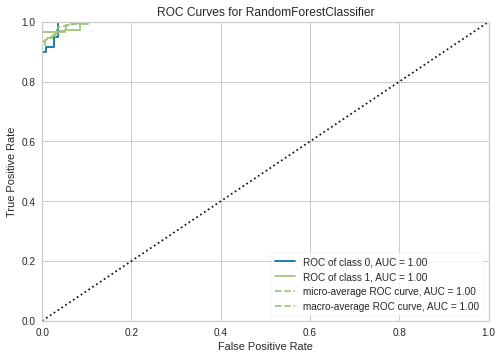

In [ ]:
# this won't work for some models but will work for others
pyc.plot_model(tuned_top5[3], plot='auc')

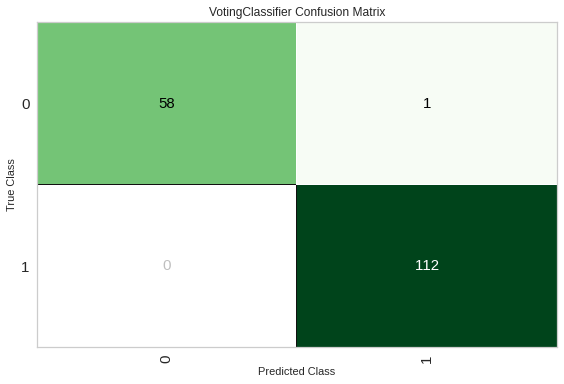

In [ ]:
pyc.plot_model(blended, plot='confusion_matrix')

In [7]:
# don't forget to run final_model = pyc.finalize_model(blended) to train on whole dataset
pred_df = pyc.predict_model(blended, df)
# with new Label column at the end
pred_df.head()

NameError: ignored